### Project NewYorkCity Taxi-Fare Predication

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df_train = pd.read_csv(r'/home/pandit/DataScience/CodingNest/Projects/Regression/New York/train.csv', nrows=2_000_00, parse_dates=["pickup_datetime"])

#### Exploratory Data Analysis

In [3]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.342877,-72.506121,39.922326,-72.518673,39.925579,1.682445
std,9.837855,11.608097,10.048947,10.724226,6.751120,1.306730
min,-44.900000,-736.550000,-3116.285383,-1251.195890,-1189.615440,0.000000
25%,6.000000,-73.992050,40.735007,-73.991295,40.734092,1.000000
50%,8.500000,-73.981743,40.752761,-73.980072,40.753225,1.000000
75%,12.500000,-73.967068,40.767127,-73.963508,40.768070,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


In [4]:
df_train.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

#### Data Pre-Processing

##### minimum Fare-Amount is Negative so we have to remove these observations

In [5]:
df_train=df_train[df_train['fare_amount']>=0]

In [6]:
len(df_train)

199987

#### Histogram of fare amount

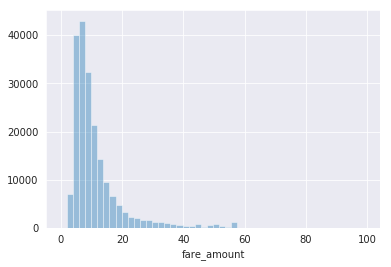

In [24]:
sns.distplot(df_train[df_train['fare_amount']<100]['fare_amount'],kde=False);

#### Removing Missing Data

In [9]:
print(df_train.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [10]:
df_train=df_train.dropna(how='any',axis='rows')

In [11]:
len(df_train)

199986

#### Test Data

In [12]:
df_test=pd.read_csv('/home/pandit/DataScience/CodingNest/Projects/Regression/New York/test.csv')

In [13]:
df_test.head(5)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


#### NewYork City coordinates are

In [15]:
latitude =  40.7141667
longitude =  -74.0063889

#### Here, we will try to define bounding box or interest by[long_min,long_max,latt_min,latt_max] using the minimum and maximum coordinates from test.csv

This will help us to make sure to train a model for the full pickup/dropoff co-ordinate for the test set

#### Minimum and Maximum Longitude Test set

In [16]:
print(min(df_test["pickup_longitude"].min(), df_test["dropoff_longitude"].min()))

-74.263242


In [18]:
print(max(df_test["pickup_longitude"].max(), df_test["dropoff_longitude"].max()))

-72.986532


#### Minimum and Maximum Lattitude Test set

In [19]:
print(min(df_test["pickup_latitude"].min(), df_test["dropoff_latitude"].min()))

40.568973


In [20]:
print(max(df_test["pickup_latitude"].max(), df_test["dropoff_latitude"].max()))

41.709555
